### Color wise  patch  Identification

usually, in any image some parts has the same color. Also we can roughly assume the stuff with same color to be same thing.<br/><br/>
Ex: - Human skin : I we could identify the human skin in a image we can apply filters only targeting it.<br/><br/>
<b>Still, due to lighting and other reason we should not expect the exact color to detect the same object; <u>should consider some threshold and let the algorithm  to be robust. Also its better to account gradients</u></b>

In [4]:
import cv2 as cv
import time
import os
import sys
from inspect import currentframe, getframeinfo,stack
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.signal as sig
import pprint
import json
import scipy.stats as scistat
import random

base = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/"
fs = 10*2
def _(*s):
    """Prints what ever the shit you put!"""
    cf = currentframe()
    print("LINE",cf.f_back.f_lineno,"printed --> ",*s)
    print("\n")


## Trying to use a threshold for the difference in all R,G,B to find similar color patches

LINE 15 printed -->  [246 194 173] [248 197 176] [247 195 173] [249 198 177]




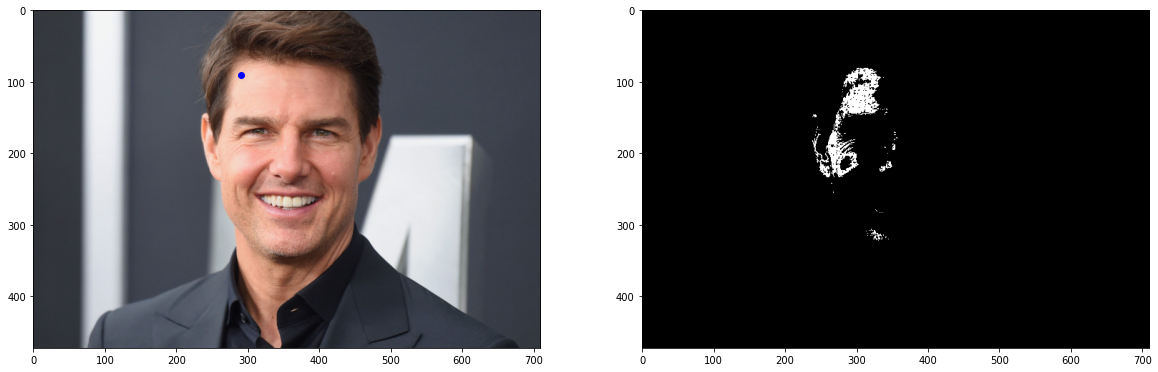

In [5]:
img = cv.imread(base + "tom.jpg",1)
img =  cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig,ax= plt.subplots(1,2,figsize=(fs,fs))


ax[0].imshow(img)
ax[0].plot([290],[90],'bo')

point1_color = img[90,290]
point2_color = img[91,290]
point3_color = img[90,291]
point4_color = img[91,291]

_(point1_color,point2_color,point3_color,point4_color)


r,g,b = cv.split(img)

errR,errG,errB = abs(r-point1_color[0]),abs(g-point1_color[1]),abs(b-point1_color[2])

thres = 15


similar = np.logical_and(errR<thres,errG<thres,errB<thres)
ax[1].imshow(similar,cmap="gray")


Even hair is selected.<br/>
The way colors appear is dependent of the environment and lighting!

In [6]:
def calc_difference_btw_pixels(v1,v2):
    return (np.abs((v1-v2)))

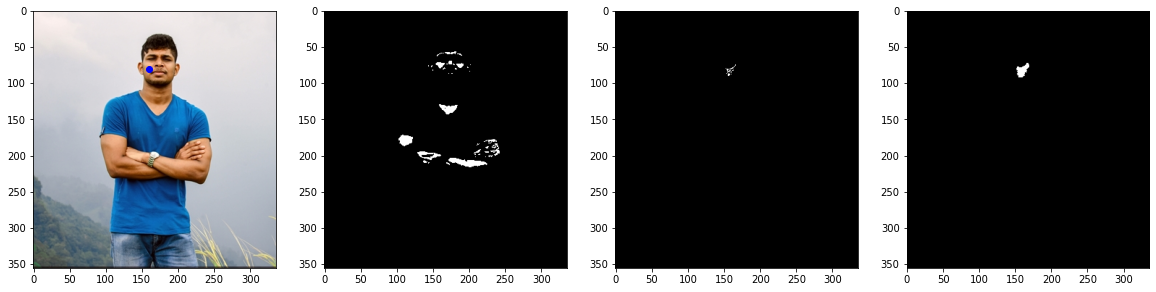

In [7]:
img = cv.imread(base + "r3ki3g.jpeg",1)
img =  cv.cvtColor(img, cv.COLOR_BGR2RGB)

selected = np.zeros(img.shape[:2])
newly_selected_from_last_iteration =[] #pixel (y,x) list :: 'selected's from last iteration
tested =  np.zeros(img.shape[:2])

fig,ax= plt.subplots(1,4,figsize=(fs,fs))




ax[0].imshow(img)
ax[0].plot([160],[80],'bo')

#selecting the first point
p1 = (80,160)
point1_color = img[p1]
selected[p1]=1
tested[p1]=1
newly_selected_from_last_iteration = [p1]


for i in range(10000):
    #try to expand from newl;y selected
    #check (go through the newly selected)

    selected_from_this_iteration = [] #newly selected pixels will be marked here
    for (y,x) in newly_selected_from_last_iteration:
        #_(y,x)
        #this pixel is selected in the last iterration
        #so better to expand

        #get neighbours
        cand_neighbours = [(y+1,x-1),(y+1,x),(y+1,x+1),(y-1,x-1),(y-1,x),(y-1,x+1),(y,x+1),(y,x-1),
                          (y+2,x-1),(y+2,x),(y+2,x+1),(y-2,x-1),(y-2,x),(y-2,x+1),(y,x+2),(y,x-2),
                          (y+2,x-2),(y+2,x+1),(y+2,x+2)]
        good_neighbours = [p for p in cand_neighbours if (0<=p[0]<img.shape[0] 
                                                          and 0<=p[1]<img.shape[1] 
                                                          and not tested[p])]
        #now the good_neigbours have untested pixels arround this newly selected pixel- 
        #(which are surely in the image bounds)
        for p in good_neighbours:
            #_(p)
            #testing
            thres = 12
            is_good_to_select = np.all(calc_difference_btw_pixels(img[y,x],img[p]) <= (thres,thres,thres))
            tested[p] = 1 #marked as tested :: so will not check on this pixel again
            if is_good_to_select:
                selected_from_this_iteration.append(p)

            
    newly_selected_from_last_iteration =  selected_from_this_iteration          
    
    #saving 'new selected's to the 'overall selected's
    #selected[newly_selected_from_last_iteration]=1
    for pToSelect in newly_selected_from_last_iteration:
        selected[pToSelect] = 1



#_(point1_color,point2_color,point3_color,point4_color)
r,g,b = cv.split(img)

errR,errG,errB = abs(r-point1_color[0]),abs(g-point1_color[1]),abs(b-point1_color[2])

thres = 39


similar = np.logical_and(errR<thres,errG<thres,errB<thres)
ax[1].imshow(similar,cmap="gray")
ax[2].imshow(selected,cmap="gray")
ax[3].imshow(tested,cmap="gray")

In [8]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[(0,0),(0,1)] = 1
a

array([[1, 1, 3],
       [4, 5, 6],
       [7, 8, 9]])

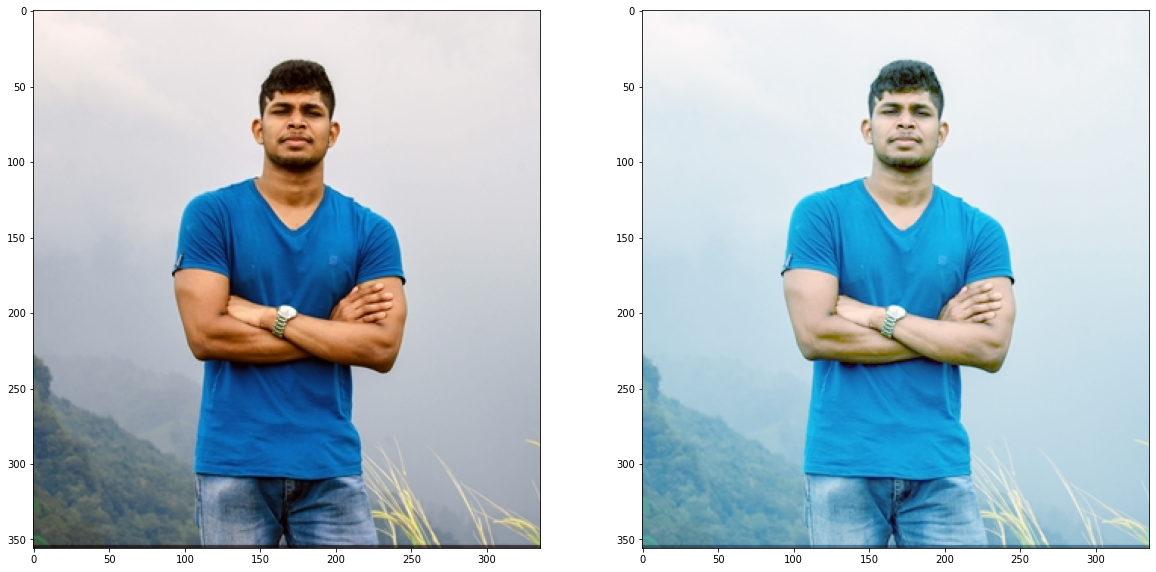

In [30]:
img = cv.imread(base + "r3ki3g.jpeg",1).astype(np.uint8)
img =  cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.uint8)

r,g,b = cv.split(img)

t1 = np.array([255*(i/255)**0.8 for i in range(0,256)]).astype(np.uint8)
t2 = np.array([255*(i/255)**0.5 for i in range(0,256)]).astype(np.uint8)
t3 = np.array([255*(i/255)**0.4 for i in range(0,256)]).astype(np.uint8)
t4 = np.array([255*(i/255)**0.2 for i in range(0,256)]).astype(np.uint8)
assert len(t1) == 256
r=cv.LUT(r,t1)
g=cv.LUT(g,t2)
b=cv.LUT(b,t3)




img2 = cv.merge((r,g,b))


fig,ax = plt.subplots(1,2,figsize=(20,10));
ax[0].imshow(img)
ax[1].imshow(img2)